In [18]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt 
from tabulate import tabulate
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
import numpy as np

In [19]:
print("Téléchargement de la structure de bande du ScSbPt...")
m = MPRester("XOCzg18zLbitVQMZilg0OGK9MJ5rjMXh")
bandstructure = m.get_bandstructure_by_material_id("mp-7173")
print("Téléchargement terminé !")

Téléchargement de la structure de bande du ScSbPt...


Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement terminé !


In [20]:
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
zero_energy = data.get('zero_energy')
distance = data.get('ticks').get('distance')
labels = data.get('ticks').get('label')
distances = data.get('distances')
energy = data.get('energy')
bandgap = bandstructure.get_band_gap()
vbmData = bandstructure.get_vbm()
cbmData = bandstructure.get_cbm()
hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10)

In [21]:
print(tabulate([["Énergie de la bande interdite : ",str(bandgap.get('energy'))+" eV"],
	            ["Bande interdite directe ? ",str(bandgap.get('direct'))],
	            ["Transition dans la bande interdite : ",str(bandgap.get('transition'))]],
	            headers=["",""]))


------------------------------------  ---------------------
Énergie de la bande interdite :       0.6440999999999999 eV
Bande interdite directe ?             False
Transition dans la bande interdite :  \Gamma-X


In [22]:
print("Maximum de la dernière bande de valence : ")
print(tabulate([["Bande(s) contenant le VBM : ",str(vbmData.get('band_index'))],
	            ["Énergie du VBM : ",str(vbmData.get('energy'))+" eV"],
	            ["(sur le graphe MP (E-Efermi) : ",str(vbmData.get('energy')-zero_energy)+" eV)"]],
	            headers=["",""]))

Maximum de la dernière bande de valence : 

------------------------------  ---------------------------------------------------------
Bande(s) contenant le VBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]})
Énergie du VBM :                6.9398 eV
(sur le graphe MP (E-Efermi) :  0.0 eV)


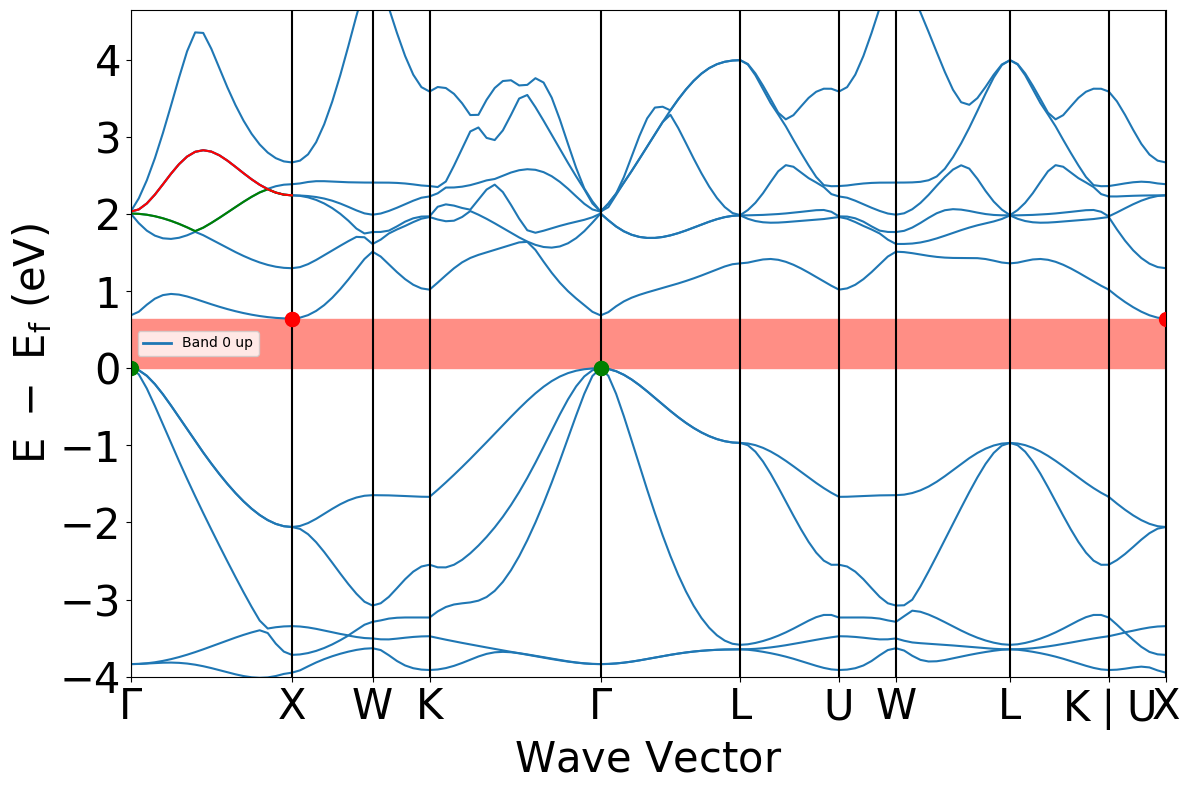

In [27]:
#affichage de la structure de bandes électroniques
plot.get_plot()
plt.fill_between(np.linspace(distance[0],distance[-1],500),0,bandgap.get('energy'),color="#FF8E85")

for i in range(len(energy)):
	plt.plot(distances[i],energy.get('1')[i][15],'g')
	plt.plot(distances[i],energy.get('1')[i][16],'r')

cbms = data.get('cbm')
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)
vbms = data.get('vbm')
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)

In [30]:
#calcule la pente sur l'intervalle (x,y)
#renvoit un tableau pour un affichage pratique des flèches : 
#    pour chaque intervalle entre 2 kpoints : [pente,x_0,y_0,dx,dy]
def slope(x,y):
	return np.array([abs((y[-1]-y[0])/(x[-1]-x[0])),x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

#calcule la dispersions maximale et minimale de la bande y
#retourne : s=tableau des résultats retournés par slope pour chaque intervalle de kpoints
#           l'indice de la pente maximale dans s
#           l'indice de la pente minimale dans s
def computeDispersions(y):
	slopes = np.zeros((len(distances),5))
	for i in range(len(slopes)):
		slopes[i] = slope(distances[i],energy.get('1')[i][y])
	s = (slopes.T)
	return (s,np.argmax(s[0]),np.argmin(s[0]))

(cbs,maxCb,minCb) = computeDispersions(16)
(vbs,maxVb,minVb) = computeDispersions(15)

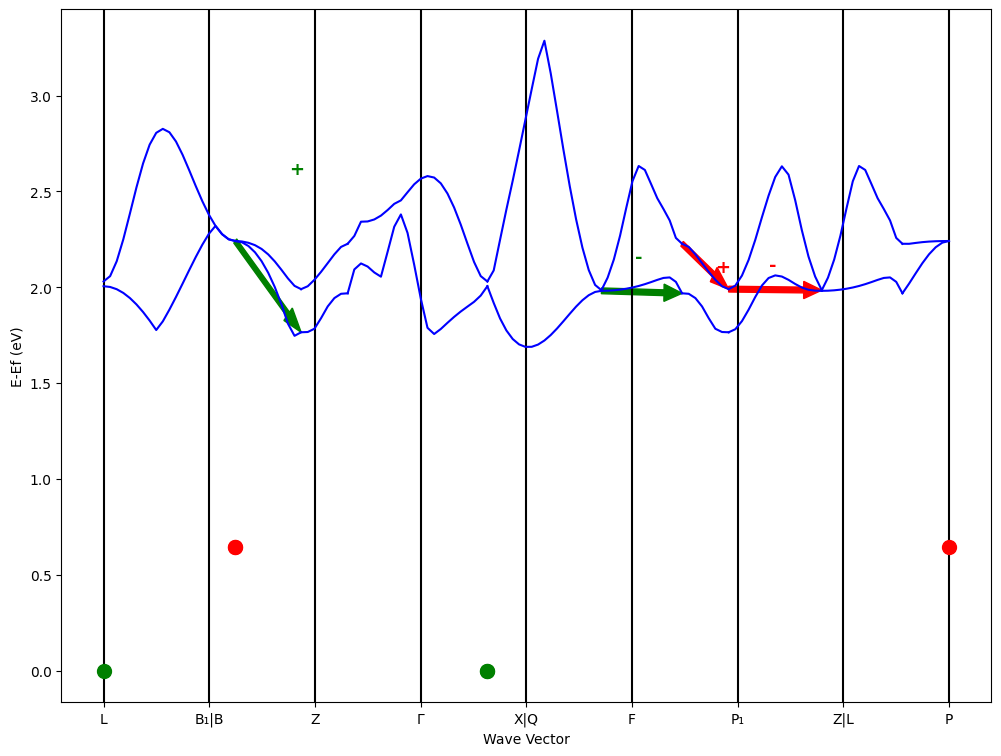

In [51]:
fig,ax = plt.subplots(1,1,figsize=(12,9))
for i in range(len(distance)):
	plt.axvline(distance[i],0,color="black")
    
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)

for i in range(len(distances)):
	plt.plot(distances[i],energy.get('1')[i][15],'b')
	plt.plot(distances[i],energy.get('1')[i][16],'b')
    
    
    
ax.set_xticks(distance)
ax.set_xticklabels(['L','B\u2081|B','Z','\u0393','X|Q','F','P\u2081','Z|L','P'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')

plt.arrow(cbs[1,maxCb],cbs[2,maxCb],cbs[3,maxCb],cbs[4,maxCb],color='red',width=0.03,length_includes_head=True)
plt.arrow(cbs[1,minCb],cbs[2,minCb],cbs[3,minCb],cbs[4,minCb],color='red',width=0.03,length_includes_head=True)
plt.arrow(vbs[1,maxVb],vbs[2,maxVb],vbs[3,maxVb],vbs[4,maxVb],color='green',width=0.03,length_includes_head=True)
plt.arrow(vbs[1,minVb],vbs[2,minVb],vbs[3,minVb],vbs[4,minVb],color='green',width=0.03,length_includes_head=True)

plt.text(cbs[1,maxCb]+0.25,cbs[2,maxCb]-0.15,"+",fontsize=13,fontweight='bold',color='red')
plt.text(cbs[1,minCb]+0.3,cbs[2,minCb]+0.1,"-",fontsize=13,fontweight='bold',color='red')
plt.text(vbs[1,maxVb]+0.4,vbs[2,maxVb]+0.35,"+",fontsize=13,fontweight='bold',color='green')
plt.text(vbs[1,minVb]+0.25,vbs[2,minVb]+0.15,"-",fontsize=13,fontweight='bold',color='green')

plt.show()


--------------------------  -------------------------------------------------------------------
Parabole d'approximation :  y(k) = 408.00319148812093k² + -2356.433230377665k 3402.185685999162
Dérivée seconde :           816.0063829762419 eVÅ²
Masse effective :           8.506450087556117e-33 kg




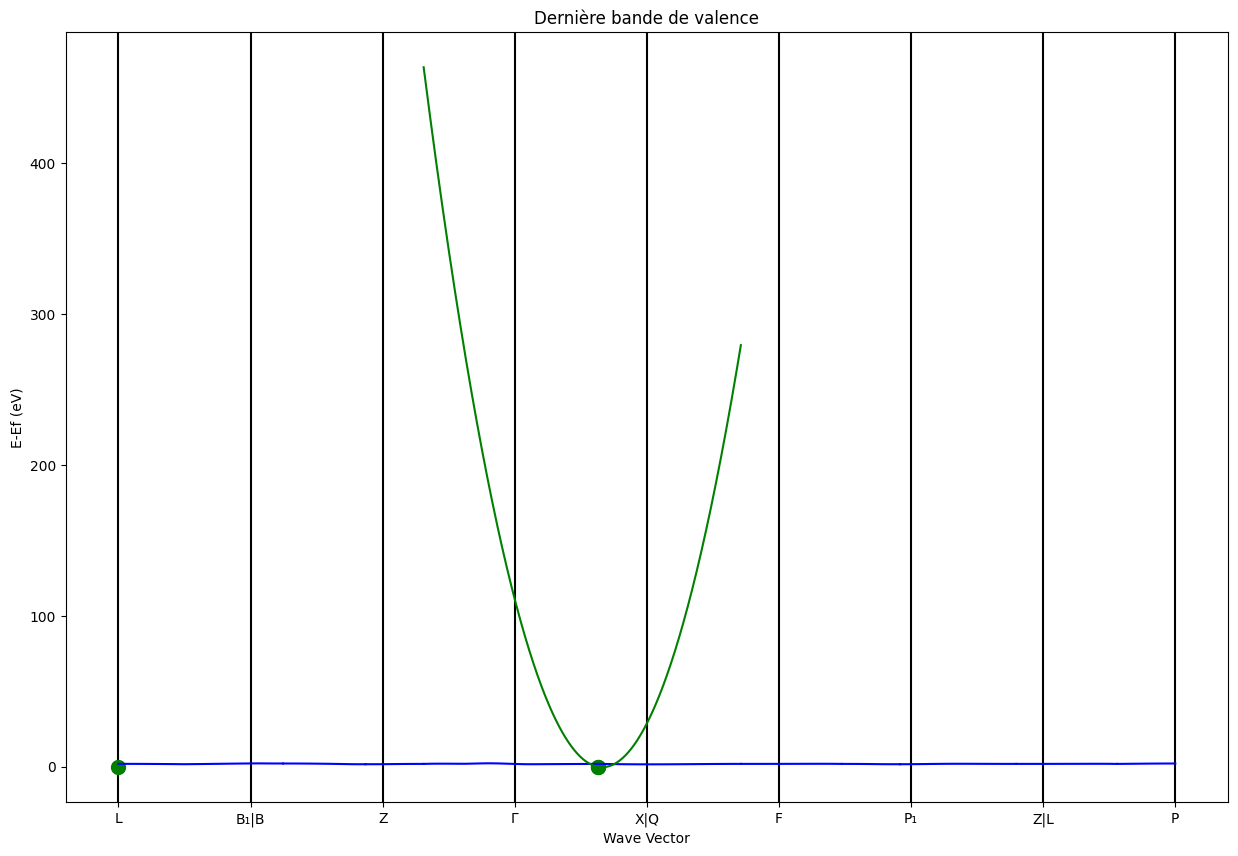

In [53]:
#plot de la dernière bande de valence et des VBM 
fig,ax = plt.subplots(1,1,figsize=[15,10])
for i in range(len(distance)):
	plt.axvline(distance[i],0,color="black")
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)
for i in range(len(distances)):
	plt.plot(distances[i],energy.get('1')[i][15],'b')
ax.set_xticks(distance)
ax.set_xticklabels(['L','B\u2081|B','Z','\u0393','X|Q','F','P\u2081','Z|L','P'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')
plt.title('Dernière bande de valence')

#calcul de la parabole d'approximation aux alentours du VBM
ks = np.zeros(3)
es = np.zeros(3)
(ks[1],es[1]) = vbms[1]
(ks[0],es[0]) = (distances[3][-2],energy.get('1')[3][15][-2])
(ks[2],es[2]) = (distances[4][2],energy.get('1')[4][15][2])
a = np.polyfit(ks,es,2)

#affichage des résultats
print(tabulate([["Parabole d'approximation : ","y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k "+str(a[2])],
	            ["Dérivée seconde : ",str(2*a[0])+" eV\u212b\u00b2"],
                ["Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" kg"]],
	            headers=["",""]))
print("\n")
x = np.linspace(distances[3][0],distances[4][-1],1000)
plt.plot(x,np.polyval(a,x),'g')
plt.show()


--------------------------  ---------------------------------------------------------------------
Parabole d'approximation :  y(k) = -0.3518498345067712k² 2.3391954908027404k +-1.3151208255774025
Dérivée seconde :           -0.7036996690135424 eVÅ²
Masse effective :           -9.864034152019787e-30 kg




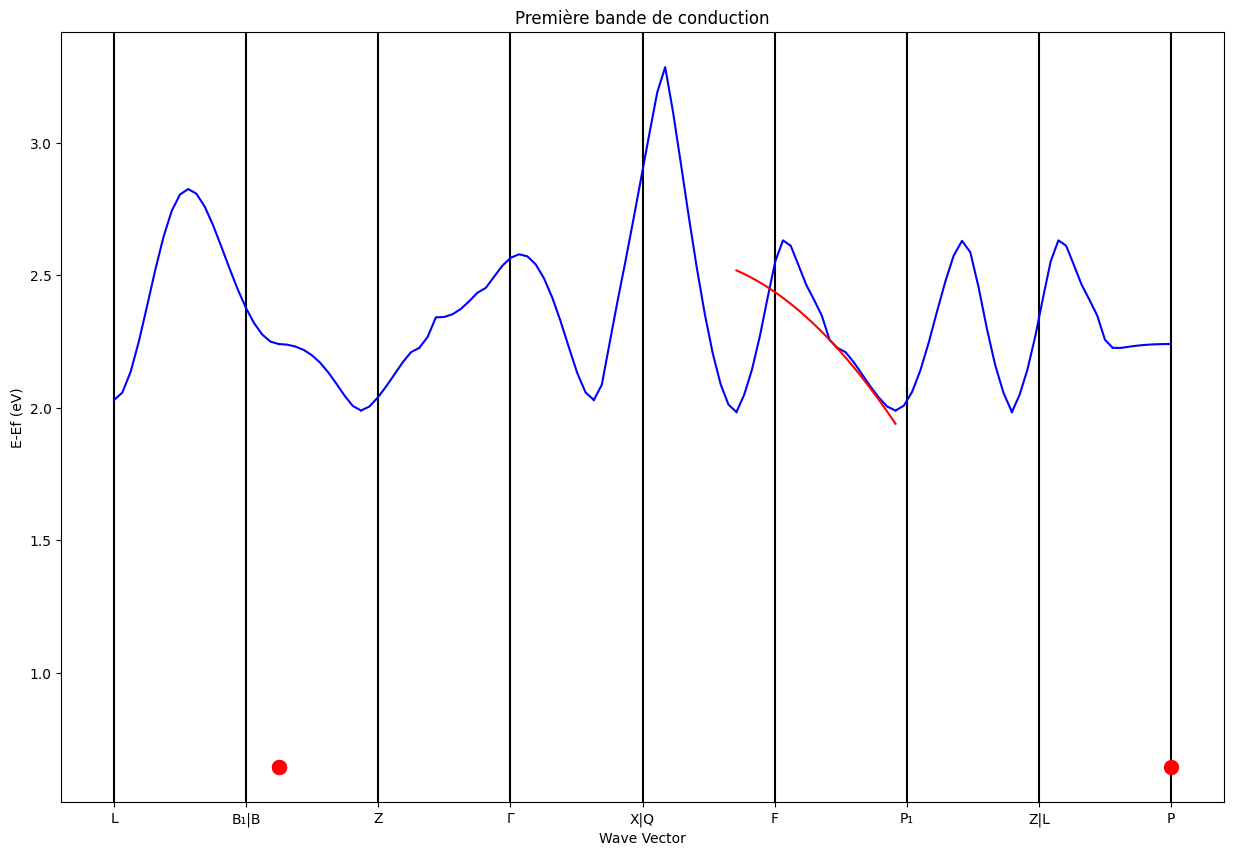

In [55]:
#plot de la première bande de conduction et du CBM
fig,ax = plt.subplots(1,1,figsize=[15,10])
for i in range(len(distance)):
	plt.axvline(distance[i],0,color="black")
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)
for i in range(len(distances)):
	plt.plot(distances[i],energy.get('1')[i][16],'b')
ax.set_xticks(distance)
ax.set_xticklabels(['L','B\u2081|B','Z','\u0393','X|Q','F','P\u2081','Z|L','P'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')
plt.title('Première bande de conduction')

#calcul de la parabole d'approximation aux alentours du VBM
ks2 = np.zeros(3)
es2 = np.zeros(3)
(ks2[1],es2[1]) = cbms[1]
(ks2[0],es2[0]) = (distances[5][-2],energy.get('1')[5][16][-2])
(ks2[2],es2[2]) = ((distances[6][2]+distances[6][1])/2,energy.get('1')[6][16][2])
a2 = np.polyfit(ks2,es2,2)

#affichage des résultats
print(tabulate([["Parabole d'approximation : ","y(k) = "+str(a2[0])+"k\u00b2 "+str(a2[1])+"k +" +str(a2[2])],
	            ["Dérivée seconde : ",str(2*a2[0])+" eV\u212b\u00b2"],
                ["Masse effective : ",str(hbar2/(2*a2[0]*electronvolt*(angstrom)**2))+" kg"]],
	           headers=["",""]))
print("\n")
x2 = np.linspace(distances[5][0],distances[6][-1],1000)
plt.plot(x2,np.polyval(a2,x2),'r')
plt.show()